<h1> 
 פרופיל בריאותי-חברתי של היישובים בישראל
2009-2005

</h1>



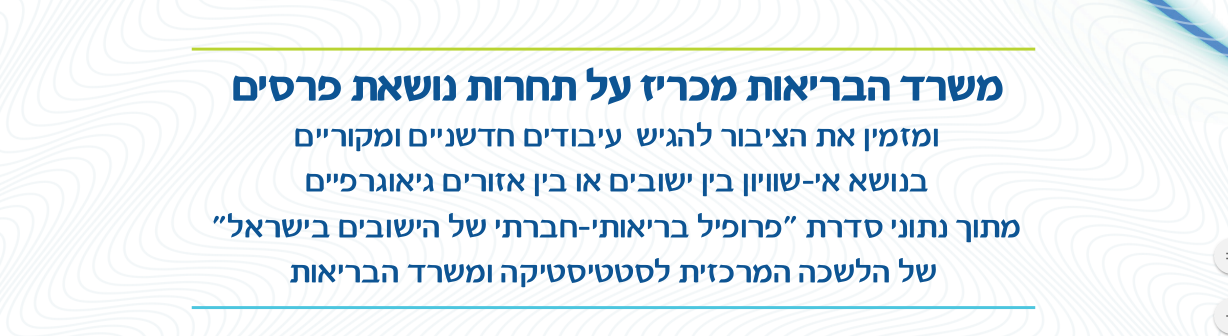

In [1]:
from helper_functions import *
Image(filename='pictures/flyer_header_wide.png', width=1000, height=1000)

<h4> ניתוח סטטיסטי וויזואליצזיה של מאפיינים חשובים </h4>
<h5> noam.kaplan85@gmail.com - נועם קפלן  </h5>
<h5> , שלום טולדו, איליה ברודר  </h5>


<h2> מבוא </h2>

<div style="direction:rtl"> <br > 
במחברת זו מתועד ומוסבר תהליך של כריית נתונים וניתוחם בכלים סטטיסטיים מתחום הלמידה החישובית. במחברת זו מוצג קוד הפייתון איתו ניתחנו את קובץ האקסל שפורסם ע"י הלמ"ס, מהלך המחקר ותוצאותיו, לרבות ויזואליזציות אינטרקטיביות שונות. 
<br />  
</div>

<div style="direction:rtl"> <br > 
כנקודת מוצא לפרוייקט בחרנו לגשת לבעיה בכלים מתמטיים והנדסיים בלבד, ללא עירוב של אינטואיציות אישיות של המעורבים. בחרנו בגישה זו כדי לוודא שאין פגמים בתהליך ניתוח המידע ולא התקיימה הטייה של המידע שחישבנו והמסקנות שאנו מספקים לאור מידע זה. 
<br/>
</div>

<a id="top"></a>

<h1> :תוכן עניינים  </h1>

 [מבוא](#מבוא)
- [1. סקירה מהירה של העיבוד המקדים](#d1.)
    - [1.1. סקירת המידע הגולמי](#d1.1.)

In [16]:
output_notebook() # Bokeh

Loading BokehJS ...

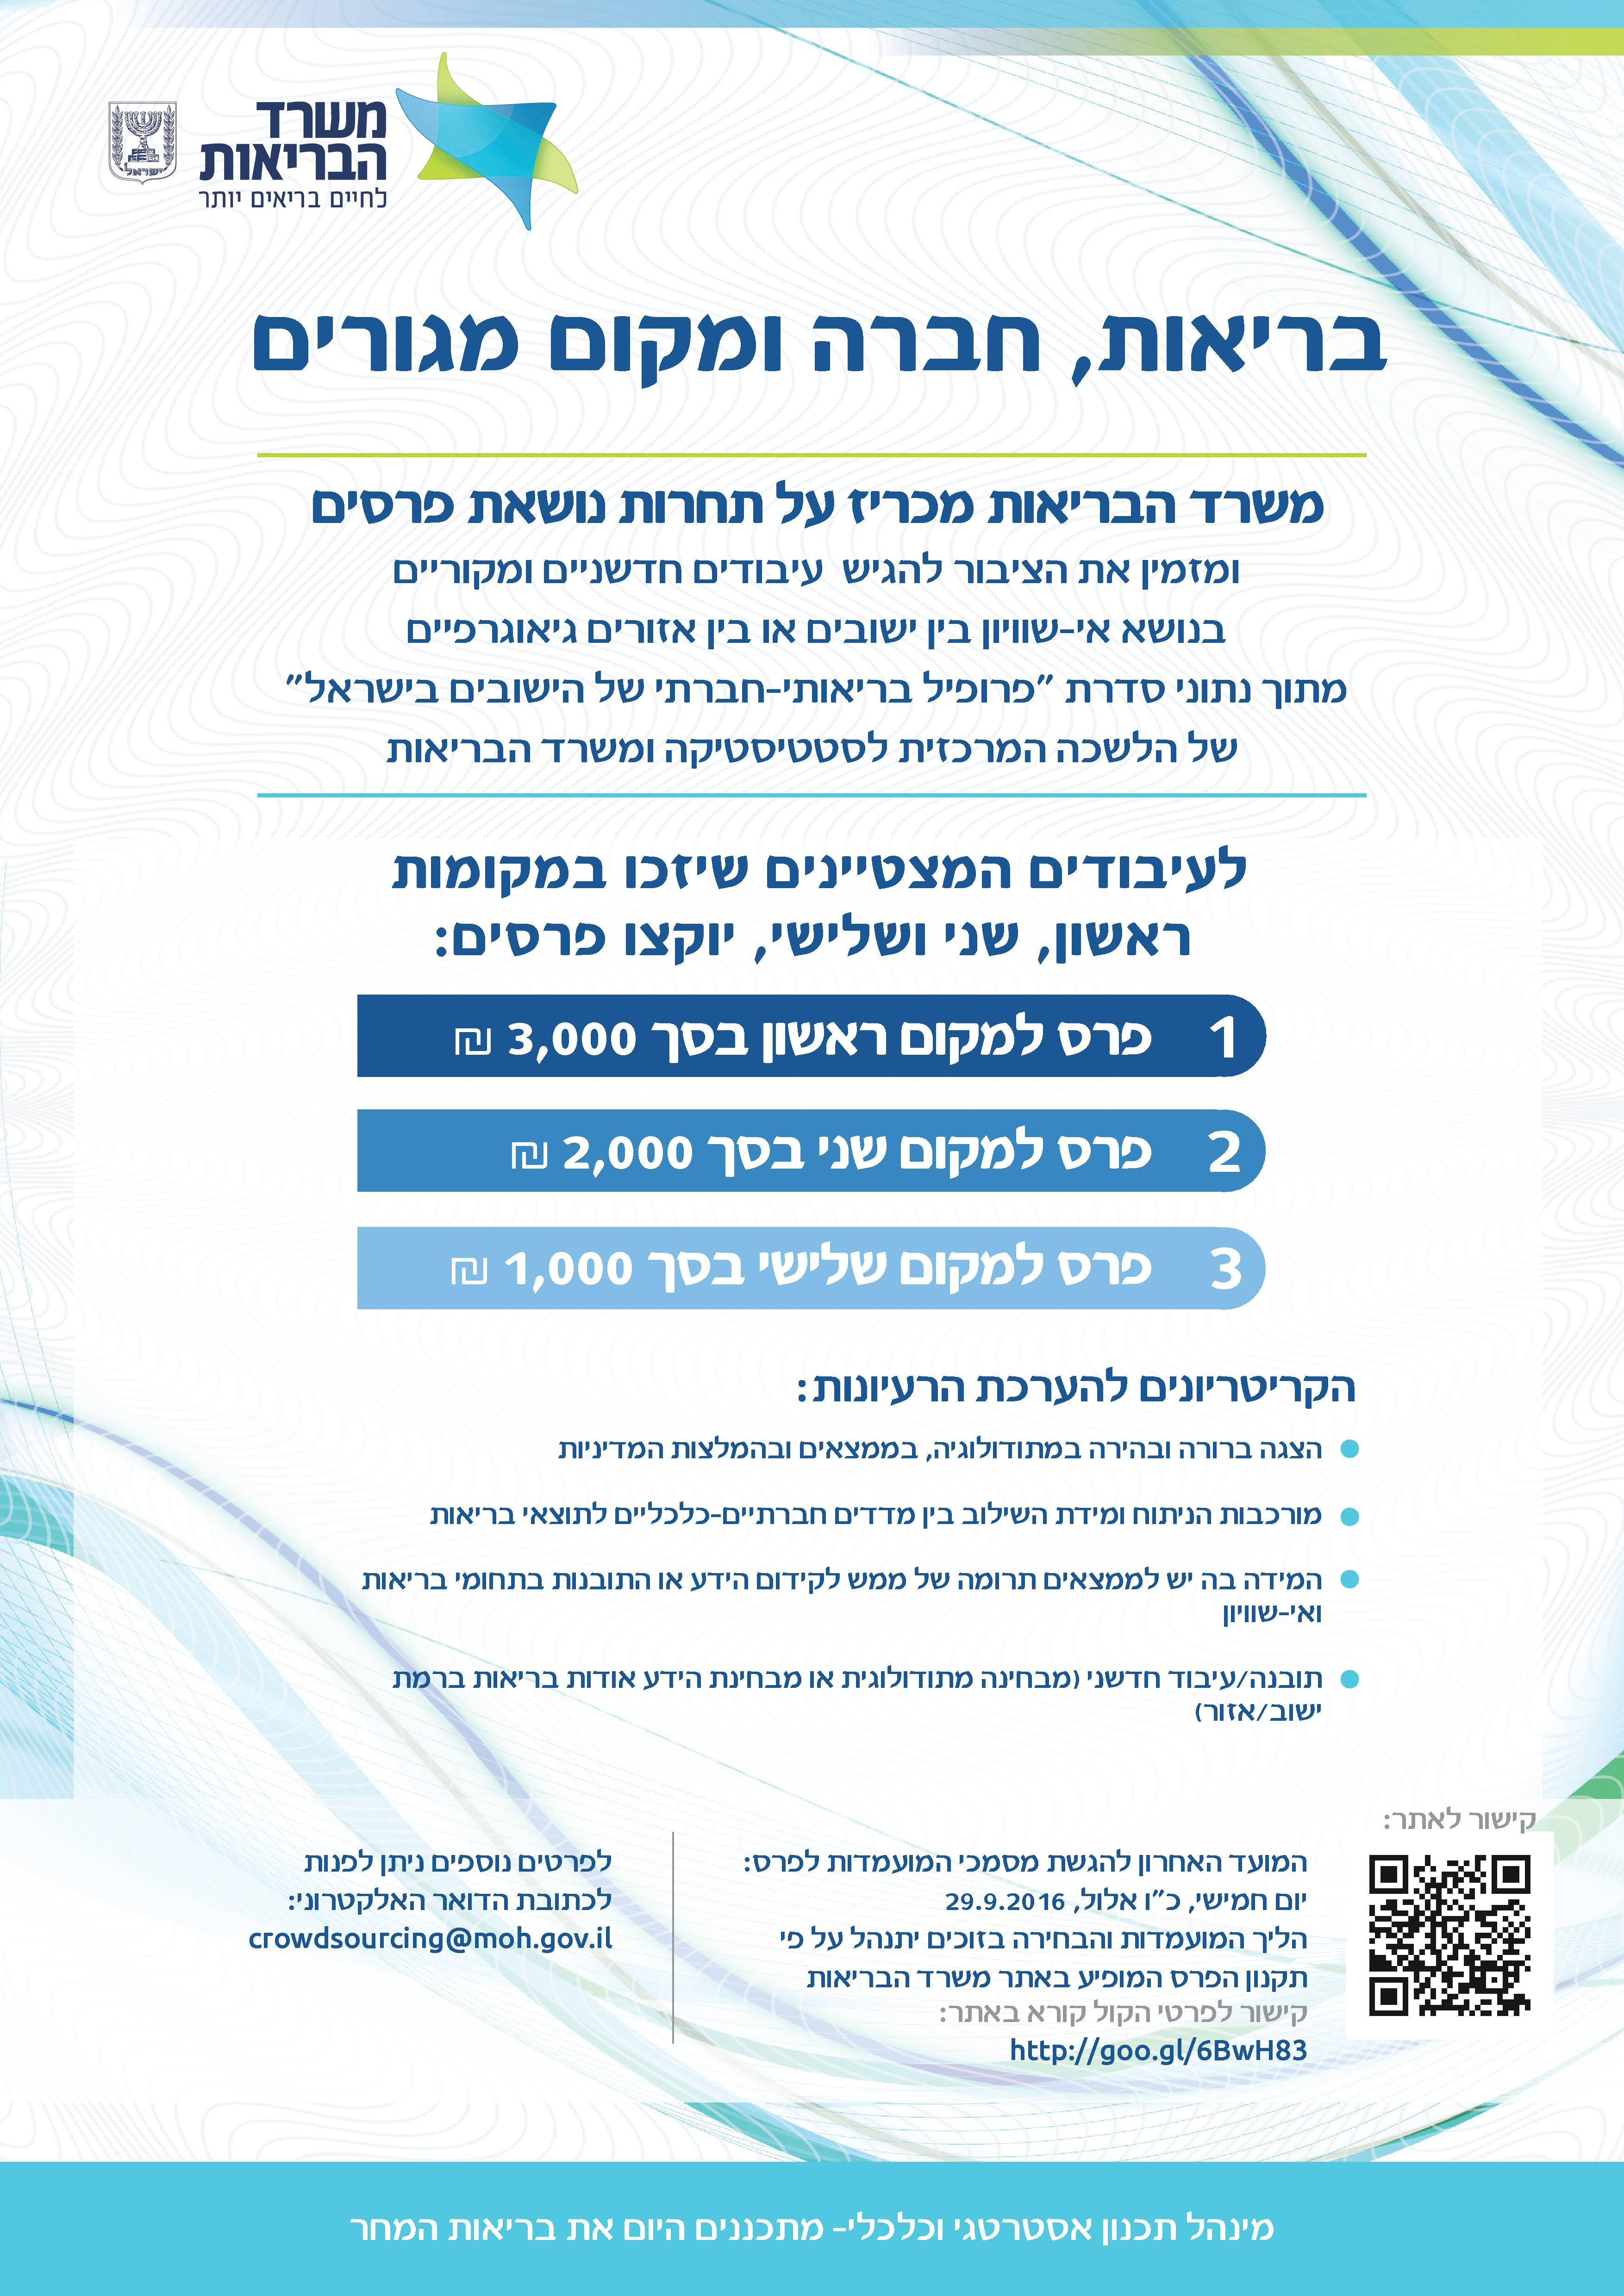

In [3]:
Image(filename='pictures/flyer.jpg', width=250, height=250)

The work on the data for the contest 

- profile: http://cbs.gov.il/webpub/pub/text_page.html?publ=105&CYear=2009&CMonth=12#7a
- pdf: http://www.health.gov.il/UnitsOffice/HRS/economy/Documents/healt_comunity.pdf


- Important: 
- Mesurments: http://cbs.gov.il/publications15/profil_ishuvim09_1580/pdf/intro1_h.pdf
- Findings: http://cbs.gov.il/publications15/profil_ishuvim09_1580/pdf/intro6_h.pdf
- Markings: http://cbs.gov.il/publications15/profil_ishuvim09_1580/pdf/symbol_h.pdf

[תוכן עניינים](#top)

<h3> קריאת המידע </h3>
<div style="direction:rtl"> <br > ישנן חמש כרטיסיות שונות של מידע. למטה מוצגות הכרטיסיות השונות ומספר העמודות בכל אחת. לכרטיסיות השונות ישנן מספר שונה של עמודות, כפי שניתן לראות בטבלה מתחת. <br /> </div>  


<div style="direction:rtl"> <br > 
ניתן לגשת לטבלה המלאה בקישור הבא: 
<br />  
https://drive.google.com/open?id=0B7eezotEK_oPWEVjazI2Rzd4Q1k
</div>

In [4]:
# Read Data: 
df = pd.read_excel('profi_h.xlsx', sheetname=None)
sheets = sorted(list(df.keys()))

In [5]:
num_feats = [len(df[s].keys()) for s in sheets]
sheets_stats_dict = {'Sheets': sheets, 'Number of features': num_feats}
col_order = ['Sheets', 'Number of featers']
sheet_stats = pd.DataFrame(sheets_stats_dict)
sheet_stats.reindex_axis(['Sheets', 'Number of features'], axis=1)

,Sheets,Number of features
0,"יישובים בינוניים (2,000-9,999)",108
1,קובץ ארצי,344
2,"קובץ יישובים גדולים (10,000 +)",352
3,קובץ מועצות איזוריות,148
4,קובץ מחוזות,347
5,קובץ נפות,347


<div style="direction:rtl"> <br > 
קובץ המידע השלם על כלל לשונותיו אינו ידידותי במיוחד. לטובת הקורא שאינו מכיר את המידע נציג חלק מהעמודות של כרטיסיה אחת לדוגמא.
<br />  
</div>
<div style="direction:rtl"> <br > 
כרטיסיה לדוגמא:  "	יישובים בינוניים (2,000-9,999)"
<br />  
</div>

In [6]:
sheet_translator = create_sheet_translator(sheet_stats)

In [7]:
sheet_i = sheet_translator['SmallTown']
print('View sheet %s.' % str(sheets[sheet_i]))
df[sheets[sheet_i]][:10]

View sheet  יישובים בינוניים (2,000-9,999).


,סמל יישוב,שם יישוב,שם מחוז,שם נפה,אשכול חברתי-כלכלי2008,מדד חברתי-כלכלי2008,מדד פריפריאליות2004,אוכלוסייה ממוצעת2010 (אלפים),אוכלוסייה ממוצעת של יהודים ואחרים2010 (אחוז),אוכלוסייה ממוצעת של יהודים2010 (אחוז),...,"מבוטחים בקופות חולים,לפי קופה, 2009 (אחוז) -לאומית","מקבלי דמי אבטלה, 2009 (אחוז מבני20-64)","מקבלי הבטחת הכנסה, 2009 (אחוז מבני0-64)","מקבלי גמלאות מהביטוח הלאומי, 2009 -סיעוד בגיל65+ (אחוז מבני אותו גיל)","מקבלי גמלאות מהביטוח הלאומי, 2009 -נכות כללית בגיל18-64 (אחוז מבני אותו גיל)","מקבלי גמלאות מהביטוח הלאומי, 2009 -נכות מעבודה ותלויים בגיל18-64 (אחוז מבני אותו גיל)","מקבלי גמלאות מהביטוח הלאומי, 2009 -ניידות בכל הגילים(אחוז מבני אותו גיל)","בני20-29הלומדים לתואר ראשון, 2009 (אחוז מבני20-29)","תלמידי ז-יב שנשרו, 2007-2009 (אחוז מכלל תלמידי ז-יב)","תלמידים בחינוך מיוחד, 2009 (אחוז מכלל התלמידים)"
0,yshuv,shemyshuv,shem_mahoz,shem_nafa,eshkol08,madad08,per04,uc2010,Jewso10,Jews10,...,Leumit09,Ravtala09,Ravtaha09,Rseud09,Rnehut09,Rtluim09,Rnayadut09,Rfdegree09,Rnoshrim0709,Rhinmey09s
1,26,ראש פינה,צפון,צפת,7,0.785136,1,2.7,99.2,97.7,...,2.8,1.4608,1.62931,10.7074,4.27552,0.771969,0.524378,33.7,( 2.4),10.9
2,28,מזכרת בתיה,מרכז,רחובות,8,1.29354,4,9.5,99.8,98.7,...,1.9,1.80096,0.544366,18.2064,2.78524,0.85004,0.322358,33.3,2.3,6.8
3,41,אליכין,מרכז,השרון,5,0.322424,3,3,100,99,...,7.3,2.09182,0.628531,38.0613,3.66803,1.45557,0.335504,12.5,( 1.2),5.7
4,46,יבנאל,צפון,כנרת,4,-0.455801,2,3.4,100,99.1,...,2.6,1.91528,2.30688,17.8179,6.62657,0.776085,0.477577,10.8,7.0,10.7
5,47,כפר תבור,צפון,כנרת,8,1.35656,2,2.7,99.8,98.4,...,1.9,1.70414,NaN,17.6322,3.23537,0.976716,0.534597,53.0,( 0.6),5.6
6,53,עתלית,חיפה,חדרה,NaN,NaN,3,5.5,98.9,96.8,...,7.1,1.73735,1.33839,21.1551,4.41536,1.08131,NaN,21.3,2.8,8.2
7,99,מצפה רמון,דרום,באר שבע,4,-0.350037,1,4.8,95.9,88.8,...,0.8,2.02478,3.45186,18.3767,5.41243,0.815572,0.464056,17.5,( 1.4),9.3
8,122,רמת ישי,צפון,יזרעאל,8,1.25059,3,6.7,100,99.1,...,2.5,1.94982,0.288733,16.6889,2.98421,1.0104,0.290266,30.0,( 1.1),9.8
9,147,גבעת ברנר,מרכז,רחובות,NaN,NaN,NaN,2.2,100,98.5,...,NaN,1.39463,NaN,NaN,NaN,NaN,NaN,19.4,( 2.2),( 9.5)


<div style="direction:rtl"> <br > 
במבט מהיר על הטבלת המידע ניתן לראות את הנתונים ולהתרשם ממספר עמודות שונות. חדי עין ישימו לב לתאים עם הערך "NaN" - ערך חסר. ניגע בנושא הערכים החסרים בהמשך.  
<br />  
</div>

<h4> עמודות </h4>

[[back to top](#top)]

In [21]:
# All distinct features: 
all_feat_set = set([feat for sheet in df for feat in df[sheet] ])
print('In all sheets together, there are %d distinct columns. ' % len(all_feat_set))

# Features present in all sheets: 
intersecting_feats =  set.intersection(*[set(df[sheet].keys()) for sheet in df])
print('There are %d features present in all sheets.' % len(intersecting_feats))

In all sheets together, there are 387 distinct columns. 
There are 84 features present in all sheets.


In [22]:
# Add number of intersecting features between sheets
intersecting_features = pd.DataFrame()
for ind, s1 in enumerate(sheets): 
    col_name = (str(ind),  ('Intersection with ' + str(s1)))
    sheet_stats[col_name[0]] = [num_intersecting_feats(data = df, sheet1 = s1, sheet2=s2) for s2 in sheets]
    intersecting_features[col_name[1]]=sheet_stats[col_name[0]]
intersecting_features['Sheets'] = sheet_stats['Sheets']
# Reorder columns: 
cols = sheet_stats.columns.tolist()
cols = [cols[1]] + [cols[0]] + cols[2:]
sheet_stats = sheet_stats[cols]

In [23]:
sheet_stats

,Number of features,Sheets,0,1,2,3,4,5,Num of not NaNs,Num of not NaNs or symbol,Num of not NaNs or symbol or parentheses
0,108,"יישובים בינוניים (2,000-9,999)",108,84,92,104,86,86,79,67,60
1,344,קובץ ארצי,84,344,337,125,340,339,344,344,300
2,352,"קובץ יישובים גדולים (10,000 +)",92,337,352,130,339,340,255,188,150
3,148,קובץ מועצות איזוריות,104,125,130,148,126,127,133,116,110
4,347,קובץ מחוזות,86,340,339,126,347,340,347,343,307
5,347,קובץ נפות,86,339,340,127,340,347,347,336,291


<div style="direction:rtl">
בטבלה מעל בעמודות הממוספרות ניתן לראות את מספר העמודות המשתופות לכל שתי כרטיסיות. ישנן בכל הגליונות יחד 387 עמודות שונות ו84 עמודות המשותפות לכל הגליונות. עקב מספר העמודות המשותף הנמוך, בחרנו להתמקד בהבנה של כל כרטיסיה בנפרד, ולא בראיה כוללת מתוך הנחה כי ניתוח של העמודות המשותפות יוגבל לחלק קטן מהמידע בלבד.  
</div>
<a id='1.2.'></a>
<h4> ערכים חסרים </h4>
<div style="direction:rtl">  
כפי שניתן לראות בטבלה המלאה, ישנם תאים רבים בהם אין ערך. מעבר לתאים החסרים ישנם מספר ערכים שונים המייצגים משמעויות שונות שאינן ערך מספרי חוקי. בחיפוש באתר המצורף בסוף ההקדמה ניתן למצוא את המקרא הבא: 
</div>

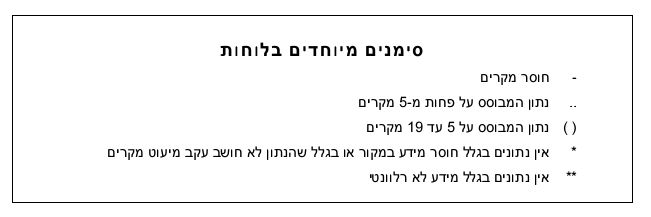

In [24]:
Image(filename='pictures/nan_val_markings.png', width=650, height=450)

<div style="direction:rtl">
ניתן ללמוד עוד על הנתונים והבעיות שלהם בקישור הבא: 
http://cbs.gov.il/publications15/profil_ishuvim09_1580/pdf/symbol_h.pdf  
</div>

<div style="direction:rtl"> <br > 
במחברת זו החלטנו לעסוק בעיקר בהפקת התובנות מהמידע הנתון. פרטי הניקיון ופירוט תהליכי הניקוי והעיבוד המקדים שביצענו זמינים במלואם בקישור הבא
TODO
<br />  </div>

<div style="direction:rtl"> <br > 
נסתפק במספר הערות על המידע: על מנת שלא לבחור ערכים לא הגיוניים שיטו תוצאות וכדי למנוע מצב של שימוש בעמודות עם רוב של ערכים חסרים, החלטנו לסנן לחלוטין כל עמוד שהיה חסר בה ערך. העדפנו לאבד עמודות ולשמור על כל השורות כדי להימנע ממצב בו לאוכלוסייה מסויימת לא קיים ערך למדד מסויים וכל הרשומות בהם רוב לאוכלוסייה זו מסוננות מתוך המידע.
<br />  
</div>

<div style="direction:rtl"> <br > 
בטבלה מתחת ניתן לראות סקירה סופית של מספר הערכים החוקיים בכל כרטיסיה. 
<br />  
</div>


In [25]:
df_no_header = dict((sheet, df[sheet][1:]) for sheet in sheets)
# Add statistics to sheet_stats without english header: 
sheet_stats['Num of not NaNs'] = [num_cols_no_NaNs(df_no_header, sheet) for sheet in sheets]
sheet_stats['Num of not NaNs or symbol'] = [num_cols_no_NaNs_symbol(df_no_header, sheet) for sheet in sheets]
sheet_stats['Num of not NaNs or symbol or parentheses'] = [num_cols_no_NaNs_symbol_par(df_no_header, sheet) for sheet in sheets]
sheet_stats[['Sheets', 'Number of features', 'Num of not NaNs or symbol or parentheses']]

,Sheets,Number of features,Num of not NaNs or symbol or parentheses
0,"יישובים בינוניים (2,000-9,999)",108,60
1,קובץ ארצי,344,300
2,"קובץ יישובים גדולים (10,000 +)",352,150
3,קובץ מועצות איזוריות,148,110
4,קובץ מחוזות,347,307
5,קובץ נפות,347,291


<div style="direction:rtl"> <br > 
ניתן לגשת לקבצי המידע הנקי בקישור הבא: 
https://drive.google.com/open?id=0B7eezotEK_oPQzRkY2lYYm5WSms
<br />  
</div>

<h2> (Principal Component Analysis)
ניתוח גורמים ראשיים  </h2>

<div style="direction:rtl"> <br>
ניתוח גורמים ראשיים היא שיטה סטטיסטית למציאת ייצוג מממד נמוך למידע רב ממדי.
<br />
בלי להכנס לאלגברה הליניארית, ניתן לומר שאנו מחשבים את הוקטורים (קומבינאציות 
<br> 
ליניאירות של העמודות הקיימות שיתארו את הכיוונים בהם מוסברת השונות במטריצת הקוורינס. )  
<br />
</div>
<div style="direction:rtl"> <br>  
ניתן לראות את כל תהליך ניתוח הגורמים הראשיים, פעם אחת באלגברה טכנית ופעם שנייה 
<br />
<br>
בעזרת החבילה של פייתון sklearn בסעיף 2.1 של המחברת הבאה: 
TODO
<br />
</div>
<div style="direction:rtl"> <br>  
לקריאה נוספת בויקיפדיה: 
https://goo.gl/t11pHY
<br />
</div>

<a id='2.1.'></a>

<h3>  Scree plot - ניתוח מקדים של הגורמיים הראשיים  </h3>

<div style="direction:rtl"> <br>
לפני שנציג את תוצאות ריצת האלגוריתם נעסוק במידת הרלוונטיות של כל גורם ראשי. בתרשים הבא חמש כרטיסיות שונות, אחת לכל לשונית במידע המקורי. כל נקודה מייצגת וקטור חדש שייצרנו מהעמודות המקוריות של לשונית זו, קומבינציות ליניאריות של המדדים המקוריים. הציר האנכי מתאר את אחוז השונות המוסברת ע"י כל וקטור כזה. הקו האדום מסמן את השונות הממוצעת,אם הייתה מוסברת ע"י כל הוקטורים בצורה אחידה. ניתן לראות כי הוקטורים שבחרנו מסבירים את המידע בצורה איכותית ולהבין עבור כל לשונית כמה מגמות שונות קיימות בה.   
<br />
</div>

<div style="direction:rtl"> <br>
נציין כי לשונית "קובץ ארצי" לא מופיעה היות ויש בה רשומה אחת בלבד ולכן אין אפשרות לתאר מגמות. 
<br />
</div>

In [28]:
# Reading clean data from disk
df_clean = pd.read_excel('/home/noamk/Dropbox/pythonWorkspase/Health/Processed_Data/Clean_Data.xlsx', sheetname=None)

In [29]:
sheets_no_national = sheets[:1] + sheets[2:]   # Remove national sheet               
plot_scree_tabs(df_clean, sheets_no_national)

<div style="direction:rtl"> <br>
מעניין לראות כי בלשונית קובץ מחוזות הגורם הראשי הראשון שחישבנו מסביר את רוב השונות, מצב שלא קיים באף לשונית אחרת. מצד שני בלשונית יישובים בינוניים מוסבר חלק קטן יותר מהשונות ע"י הוקטור הראשון. תוצאה ראשונית זו הגיונית לאור העובדה שישנם יישובים קטנים רבים יותר ממחוזות. בעוד על פני מחוז שלם הרבה תופעות קטנות מתמצעות, לכל יישוב קטן את האופי שלו, האוכלוסייה והתנאים הספציפיים שלו.
</div>

In [15]:
#pca_vec_row(eig_pairs_abs, df_par_clean['קובץ נפות'] )
pca_trends = pca_vec_table(df_clean, sheets_no_national)
# Save pca_trends for manual work
pca_trends.to_csv(path_or_buf='/home/noamk/Dropbox/pythonWorkspase/Health/Processed_Data/PCA_Trends_10_.csv')

NameError: name 'df_par_clean' is not defined

In [19]:
pd.read_csv('/home/noamk/Dropbox/pythonWorkspase/Health/Processed_Data/PCA_Manual_summed.csv')

,Sheet,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4
0,"יישובים בינוניים (2,000-9,999)",אוכלוסייה לפי מין וגיל,פטירות לפי מין2005-2009,פטירות ולידות,"אוכלוסייה לפי מין, גידול שנתי ופיריון","אוכלוסייה, אחוז ממוצע של יהודים"
1,"קובץ יישובים גדולים (10,000 +)","אוכלוסייה (יהודים-ערבים), אוכלוסייה לפי מין, סרטן","שחרורים מאשפוז, פטירות","לידות חי, רשומים לשרותים\nאוכלוסייה\nריבוי טבעי","אוכלוסייה, רשומים לשרותים חברתיים, פריון, אשפ...","שחרורים מאשפוז, פטירות"
2,קובץ מועצות איזוריות,"אוכלוסייה, שכר ממוצע, חברתי-כלכלי","שחרורים מאשפוז, פטירות","אוכלוסייה ממוצעת, אוכלוסייה, ריבוי טבעי\nרשומי...","אוכלוסייהת קופות חולים, שכר (גברים), קופות חולים","סוגי נזקקות,קופות חולים, ממוצע יהודים, אוכלוסי..."
3,קובץ מחוזות,"בעלי מוגבלויות גמלאות,שחרורים מאשפוז, סרטן, לי...","שכר, ביטוחי בריאות פרטי, ג'יני, תמותה ומומים ב...","חינוך, משתקמים, מקבלי אבטלה, פריון","עולים, נזקקות, פטירות סרטן, גמלאות\nיילודים עם...","ריבוי טבעי, סוגי נזקקות, לידות ופטירות תינוקות..."
4,קובץ נפות,"סרטן(שד, ערמונית, מעי, ריאות), אוכלוסייה מבוגר...","פטירות, סרטן, תוחלת חיים, קשיי ריכוז, משתקמים,","פטירת תינוקות, לידות מום","שחרורים מאשפוז, מוגבלויות, סרטן, אוכלוסייה,","שחרורים מאשפוז, משתקמים"


In [20]:
#pd.read_csv('/home/noamk/Dropbox/pythonWorkspase/Health/Processed_Data/PCA_Trends_10_processed.csv.xlsx')
processed_pca = pd.read_excel('/home/noamk/Dropbox/pythonWorkspase/Health/Processed_Data/PCA_Trends_10_processed.csv.xlsx', sheetname=None)
processed_pca['PCA_Trends_manual']

,Sheet,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4
0,"יישובים בינוניים (2,000-9,999)",אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-סך הכל5...,"פטירות לפי מין2005-2009 (שיעור ל- 1,000תושבים)...","פטירות לפי מין2005-2009 (שיעור ל- 1,000תושבים)...",אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-נקבה35-...,אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-סך הכל1...
1,"קובץ יישובים גדולים (10,000 +)",אוכלוסייה ממוצעת של יהודים ואחרים2010 (אחוז)\n...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","לידות חי לפי שבוע היריון, 2005-2009 (מספר) -סך...",אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-סך הכל3...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
2,קובץ מועצות איזוריות,אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-נקבה5-1...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...",אוכלוסייה ממוצעת2010 (אלפים)\nאוכלוסייה לפי מי...,אוכלוסייה לפי מין וגיל2005-2009 (אחוז)-סך הכל3...,"סוגי נזקקות מוגדרת:עוני, קשיי הכנסה ותעסוקה(אח..."
3,קובץ מחוזות,"בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שכר ממוצע לחודש, 2009 -נשים\nשכר ממוצע לחודש, ...","תלמידים בחינוך מיוחד, 2009 (אחוז מכלל התלמידים...",עולי1990ואילך ב- 2010 (אחוז)\nסמל מחוז\nסוגי נ...,ריבוי טבעי שנתי2010 (מספר)\nסוגי נזקקות מוגדרת...
4,קובץ נפות,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...","פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט)\nתמותת תינוקות...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."


In [21]:
df_dict = {'1': ["asdf"+ "\r\n" asdfad", 'asdfadf'], '2': ['adsfadf', 'hfghfh']}
pd.DataFrame(df_dict)
#pd.DataFrame(['asdf \n asdfad', 'asdfadf'], columns=['1', '2'])
#pd.DataFrame([['asdf \n asdfad'], ['asdfadf']], columns=[1, 2])

SyntaxError: invalid syntax (<ipython-input-21-5432cd45c154>, line 1)

In [22]:
eig_vecs, eig_vals = [], []
for sheet in df_par_clean.keys(): 
    eig_v

NameError: name 'df_par_clean' is not defined

In [23]:
sheet_name_heb = 'קובץ נפות'

In [24]:
eig_vecs, eig_vals = calc_eig_vals(df_par_clean[sheet_name_heb])

NameError: name 'df_par_clean' is not defined

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [25]:
# Return a list of indexes of the n largest entries (features) in Eign Vector: 
def get_ind_largest_feats(vec, n=5, return_vals=False):
    # Sorting by absulute value of entry. 
    sorted_vec =  sorted(list(enumerate(vec)), key=lambda x: np.abs(x[1]), reverse=True) 
    if return_vals: 
        return [x for x in sorted_vec][:n]
    else: 
        return [x[0] for x in sorted_vec][:n]

# Return name of a feature by index
def get_feature_name(data, sheet_name, index): 
    return data[sheet_name].columns[index]

def get_feature_names(data, sheet_name, indexes): 
    return [get_feature_name(data, sheet_name, index) for index in indexes]

In [26]:
[(ind, sum(abs_norm_eigvals[:i])) for ind, i in enumerate(range(10))]

NameError: name 'abs_norm_eigvals' is not defined

In [40]:
feat_indexes = get_ind_largest_feats(eig_pairs[4][1], n=10, return_vals=False)
# print([(x[0], np.abs(x[1])) for x in feat_indexes])
# print(len(eig_pairs[0][1]))
get_feature_names(df_par_clean, sheets[sheet_i], feat_indexes)
# feat_indexes


['שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34',
 'משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושבים),נקבה,  45-64',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),שני המינים, 25-34',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 15-24',
 'משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושבים),נקבה,סך הכל15+',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),זכר, 65-74',
 'משתקמים2005-2009 (שיעור ל- 100,000תושבים),שיעור מתוקנן,נקבה,סך הכל15+,רווח סמך גבול עליון',
 'משתקמים2005-2009 (שיעור ל- 100,000תושבים),שיעור מתוקנן,נקבה,סך הכל15+',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),שני המינים, 65-74',
 'משתקמים2005-2009  (שיעור ל- 100,000תושבים),שיעור מתוקנן,נקבה,סך הכל15+,רווח סמך גבול תחתון']

In [44]:
from nltk import word_tokenize, FreqDist
f = get_feature_names(df_par_clean, sheets[sheet_i], feat_indexes)
words_lists = [word_tokenize(f_i) for f_i in f]
word_list = [word for splitted_words in words_list for word in splitted_words]
words_freqDist = FreqDist(word_list)
words_freqDist.N

NameError: name 'words_list' is not defined

In [43]:
[word for splitted_words in words_list for word in splitted_words]

NameError: name 'words_list' is not defined

In [1]:
trends = pd.DataFrame()
for i in range(5): 
    feat_indexes = get_ind_largest_feats(eig_pairs[i][1], n=5, return_vals=False)
    trends['Vector_'+str(i)] = get_feature_names(df_par_clean, sheets[sheet_i], feat_indexes)
    trends['Sheet'] = sheets[sheet_i]
trends

NameError: name 'pd' is not defined

In [47]:
trends.columns

Index(['Vector_0', 'Sheet', 'Vector_1', 'Vector_2', 'Vector_3', 'Vector_4'], dtype='object')

In [48]:
pca_trends = pd.concat([pca_trends, trends],)# axis=1)

In [15]:
pca_trends

NameError: name 'pca_trends' is not defined

In [50]:
multivec_feat_indexes = [ get_ind_largest_feats(eig_pairs[i][1], n=1,)[0] for i in range(5) ]
#multivec_feat_indexes_2 = sum(multivec_feat_indexes, [])


In [51]:
pca_trends1 = pca_trends

In [52]:
grouped = pca_trends1.groupby(['Sheet'])

In [53]:
#grouped.aggregate(np.sum)

<a id='2.2.'></a>

## 2.2. 

[back to top](#top)

#### Big Towns: 

In [54]:
abs_eigvals = [np.abs(x) for x in eig_vals]
sum_eigvals = sum(abs_eigvals)
abs_norm_eigvals = [x/sum_eigvals for x in abs_eigvals]
# Bokeh Scree plot
x = list(range(len(abs_norm_eigvals)))
y = abs_norm_eigvals
scree_title = 'Scree plot - ' + sheets[sheet_i]
p = figure(plot_width=1000, plot_height=400, title=scree_title)# x_range=len(abs_eigvals))
# add both a line and circles on the same plot
p.xaxis.axis_label = "Index of Eigen value"
p.yaxis.axis_label = "Amount of variance explained"
p.multi_line([x, x] , [y, [1/len(x) for x_ in x]], line_width=[2, 7], color=['navy', 'firebrick',],)
p.circle(x, y, fill_color="purple", size=8, alpha=0.5)

show(p)

In [55]:
trends

,Vector_0,Sheet,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


#### SmallTowns

In [56]:
trends

,Vector_0,Sheet,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


#### Regional councils: 

In [57]:
trends

,Vector_0,Sheet,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


#### Nafa: 

In [58]:
trends

,Vector_0,Sheet,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


#### Mahoz:

In [59]:
abs_eigvals = [np.abs(x) for x in eig_vals]
sum_eigvals = sum(abs_eigvals)
abs_norm_eigvals = [x/sum_eigvals for x in abs_eigvals]
# Bokeh Scree plot
x = list(range(len(abs_norm_eigvals)))
y = abs_norm_eigvals
scree_title = 'Scree plot - ' + sheets[sheet_i]
p = figure(plot_width=1000, plot_height=400, title=scree_title)# x_range=len(abs_eigvals))
# add both a line and circles on the same plot
p.xaxis.axis_label = "Index of Eigen value"
p.yaxis.axis_label = "Amount of variance explained"
p.multi_line([x, x] , [y, [1/len(x) for x_ in x]], line_width=[2, 7], color=['navy', 'firebrick',],)
p.circle(x, y, fill_color="purple", size=8, alpha=0.5)

show(p)

In [60]:
trends.columns=sorted(trends.columns)
trends

,Sheet,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


In [61]:
trends['Vector_4'][0]

'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34'

<a id='2.3.'></a>

### 2.3. Manually Processed Trends

[back to top](#top)

<a id='2.3.1.'></a>

### 2.3.1. Manual essence of all sheets

[back to top](#top)

In [62]:
man_sheets_pca = pd.DataFrame(columns=['Sheet', 'Principal Component', 'Explained Variance'])
man_sheets_pca

,Sheet,Principal Component,Explained Variance


<a id='2.3.2.'></a>

### 2.3.2. Manual essence each sheet

[back to top](#top)

In [63]:
man_nafa_PCA_names = ['Death', ]
man_nafa_pca = pd.DataFrame(columns=['Principal Component Name', 'Element', 'Size of Element'])
man_nafa_pca


,Principal Component Name,Element,Size of Element


In [64]:
trends = trends[sorted(trends.columns)]
trends

,Sheet,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4
0,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...",פטירות תינוקות2010 (מספר מוחלט),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
1,"מקרים חדשים של סרטן ריאות לפי מין, 2005-2009 (...",קובץ נפות,פטירות לפי סיבות מוות2005-2009 (שיעור מתוקנן ל...,תמותת תינוקות לפי סיבת מוות2005-2009 (שיעור ל-...,"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."
2,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור...",קובץ נפות,"רווח סמך לתוחלת חיים בלידה, (זכר) -גבול עליון",ריבוי טבעי שנתי2010 (מספר),"שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
3,"מקרים חדשים של סרטן שד בנשים, 2005-2009 (מספר ...",קובץ נפות,"תקנון פטירות2005-2009 (שיעור מתוקנן ל- 1,000תו...","שיעור פריון ל- 1,000נשים,לפי גיל האם,ממוצע2005...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שי..."
4,"מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 ...",קובץ נפות,"פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תו...","יילודים עם מומים מולדים2005-2009 (שיעור ל- 1,0...","בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכולי...","משתקמים לפי גיל2005-2009 (שיעור ל- 100,000תושב..."


In [65]:
manual_trends_nafa = pd.DataFrame(columns=[PCA])

NameError: name 'PCA' is not defined

<a id='3.'></a>

## 3. Visualizing results

[back to top](#top)

<a id='3.1.'></a>

### 3.1. Matrix scatter plot

[back to top](#top)

TODO: 
- 

In [60]:
import seaborn as sns
# Create scatter matrix plot: 
def matrix_scatter(data, dot_color=None): 
    sns.pairplot(data, hue='Arabic population(%) categorical')

In [ ]:
# TODO: complete all tabs
feature_translator = { 'Arab_pop_percent_2010': 'אוכלוסייה ממוצעת של ערבים2010 (אחוז)', 
                       'Napa_name': 'שם נפה', 
                       'Mahoz_name': 'שם מחוז'}

In [61]:
c1 = df[pca_sheet_name][feature_translator['Napa_name']].values[1:]
s = pd.Series(pd.Categorical(c1, categories=list(set(c1))))

In [62]:
s.cat.categories

Index(['נפת חדרה', 'נפת יזרעאל', 'נפת כנרת', 'נפת השרון', 'נפת צפת', 'נפת עכו',
       'נפת רמלה', 'נפת באר שבע', 'נפת חיפה', 'נפת רחובות', 'נפת גולן',
       'נפת פתח תקווה', 'נפת אשקלון'],
      dtype='object')

a : מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 (מספר ממוצע)
b : פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תושבים),רווח סמך-זכר,גבול תחתון
c : פטירות תינוקות2010 (מספר מוחלט)
d : שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),זכר, 75+
e : שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34


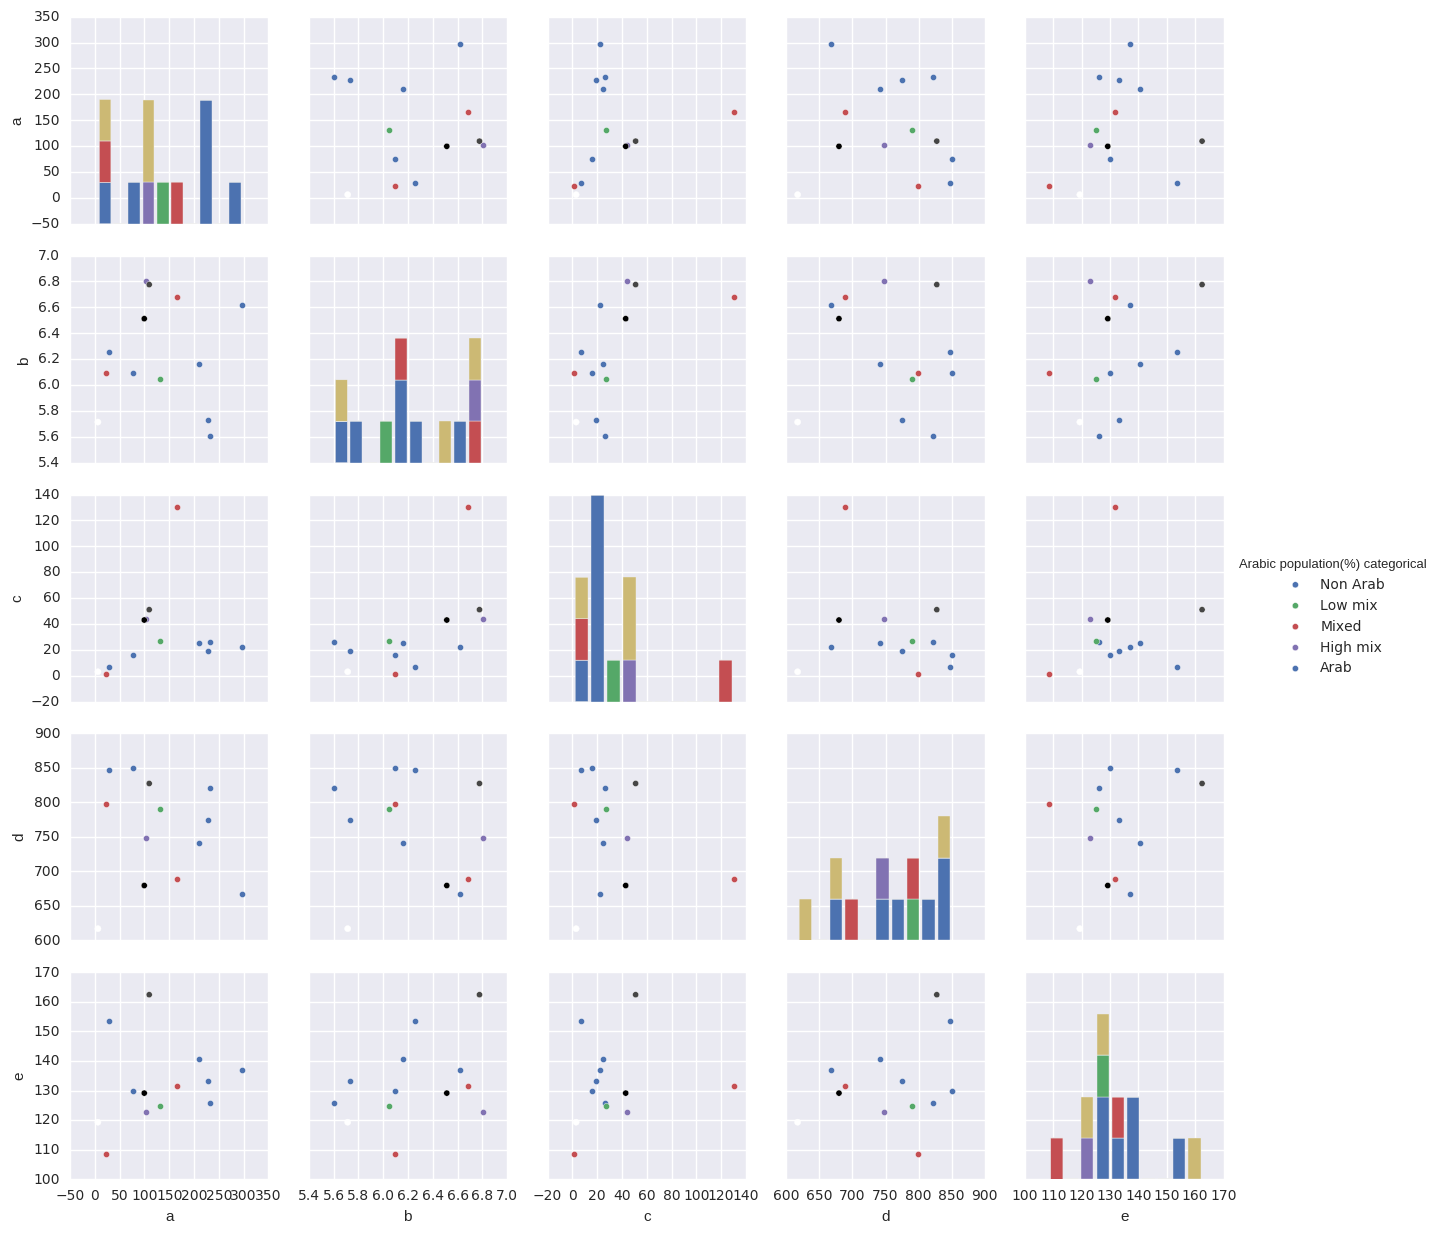

In [63]:
pca_sheet = df_par_clean[pca_sheet_name]
d_1 = pd.DataFrame()
for letter, index in zip(map(chr, range(97, 123)[:5]), multivec_feat_indexes[:5]): 
    d_1[letter] = pca_sheet[pca_sheet.columns[index]]
    print(letter, ':', pca_sheet.columns[index])
d_1['Arabic population(%) categorical'] = pd.cut( np.asanyarray( pca_sheet[feature_translator['Arab_pop_percent_2010']] ), 5, labels=["Non Arab",'Low mix', "Mixed", 'High mix', "Arab"])
matrix_scatter(d_1, )

In [64]:
multivec_feat_indexes

[273, 226, 151, 134, 262]

In [65]:
[pca_sheet.columns[i] for i in multivec_feat_indexes]

['מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 (מספר ממוצע)',
 'פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תושבים),רווח סמך-זכר,גבול תחתון',
 'פטירות תינוקות2010 (מספר מוחלט)',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),זכר, 75+',
 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34']

<a id='3.2.'></a>

### 3.2. Tool Tip

[back to top](#top)

In [182]:
#########################  Bokeh  #######################################
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.charts import Histogram
from bokeh.layouts import gridplot
import matplotlib as mpl

from matplotlib.mlab import bivariate_normal

from bokeh.plotting import figure, output_file, show
from bokeh.models import LogColorMapper, LogTicker, ColorBar
# 	output_notebook()

In [200]:
# TODO: 
#1) Add other params to display with hover
#2) Add heatmap bar for color of dots
#3) Add legend for size of dots
def toolTip_scatter_5d(sheet, original_sheet, x_var, y_var, size_var, color_var, hover_var, min_size=4):
    sum_size = sum(sheet[size_var])
    source = ColumnDataSource(
        data=dict(
            x = [x for x in sheet[x_var]], 
            y = [x for x in sheet[y_var]],
            size_norm =  [min_size + 2*min_size*x/sum_size for x in sheet[size_var]], 
            size_ = [x for x in sheet[size_var]],
            #color_ = [5 + 5*x for x in sheet[color_var]],
            color_ = ["#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 
                                255*mpl.cm.viridis(mpl.colors.Normalize()(sheet[color_var]))],
            color_hover = [x for x in sheet[color_var]],
            hover_title = [x for x in original_sheet[hover_var]][1:],)) #In original sheet first english row not removed

    hover = HoverTool(
        tooltips=[
            ("Name", "@hover_title"),
            (color_var+' (color)', '@color_hover'),
            (size_var+ ' (radius)', "@size_"),
            ("(x,y)", "($x, $y)"),])
#             ("Frequency", "@frequency"),]) # TODO: remove fo
    TOOLS = 'box_zoom,box_select,resize,reset, wheel_zoom'

    p = figure(title='Single Language 2D Word Projection on PCA of '+hover_var,
                tools=TOOLS, plot_width=900, plot_height=450, )
    p.add_tools(hover)
    p.xaxis[0].axis_label = x_var
    p.yaxis[0].axis_label = y_var
    p.scatter('x', 'y', radius='size_norm', color='color_',
              source=source,fill_alpha=0.6) #fill_color=colors,
    show(p)

In [202]:
'שם נפה' in list(df_par_clean['קובץ נפות'].keys())
#df_par_clean['קובץ נפות'] ['שם נפה'] = df['קובץ נפות']['שם נפה']

False

In [201]:
data_dict = {'sheet': df_par_clean['קובץ נפות'], 
             'original_sheet': df['קובץ נפות'], 
             'x_var':'מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 (מספר ממוצע)',
             'y_var':'פטירות לפי גיל ומין2005-2009 (שיעור ל- 1,000תושבים),רווח סמך-זכר,גבול תחתון',
             'size_var': 'פטירות תינוקות2010 (מספר מוחלט)',
             'color_var': 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34',
             'hover_var': 'שם נפה',}
toolTip_scatter_5d(**data_dict)


In [203]:
data_dict = {'sheet': df_par_clean['קובץ מחוזות'], 
             'original_sheet': df['קובץ מחוזות'], 
             'x_var':'בעלי מוגבלויות,2008, מתקשים מאוד או אינם יכוליםלראות(אחוז מבני5 ומעלה) - נקבה',
             'y_var':'מקבלי גמלאות מהביטוח הלאומי, 2009 -ניידות בכל הגילים(אחוז מבני אותו גיל)',
             'size_var': 'מקרים חדשים של סרטן(כל הסוגים)לפי מין, 2005-2009 (שיעור מתוקנן ל- 100,000תושבים),זכר,רווח סמך גבול תחתון',
             'color_var': 'מקרים חדשים של סרטן(כל הסוגים)לפי מין, 2005-2009 (שיעור מתוקנן ל- 100,000תושבים),זכר,רווח סמך גבול תחתון',
             'hover_var': 'שם מחוז',}
toolTip_scatter_5d(**data_dict)

In [195]:
data_dict = {'sheet': df_par_clean['קובץ נפות'], 
             'original_sheet': df['קובץ נפות'], 
             'x_var':'מקרים חדשים של סרטן ערמונית בגברים, 2005-2009 (מספר ממוצע)',
             'y_var':'מקרים חדשים של סרטן שד בנשים, 2005-2009 (שיעור מתוקנן ל- 100,000תושבים),רווח סמך גבול תחתון',
             'size_var': 'פטירות תינוקות2010 (מספר מוחלט)',
             'color_var': 'שחרורים מאשפוז כללי לפי גיל ומין2005-2009, (שיעור ל- 1,000תושבים),נקבה, 25-34',
             'hover_var': 'שם נפה',}
toolTip_scatter_5d(**data_dict)

<a id='3.3.'></a>

### 3.3. PCA Donut Chart

[back to top](#top)

In [ ]:
# General donut chart: 
1) 

In [178]:
from bokeh.charts import Donut, show, output_file
from bokeh.charts.utils import df_from_json
from bokeh.sampledata.olympics2014 import data

import pandas as pd

# utilize utility to make it easy to get json/dict data converted to a dataframe
df = df_from_json(data)

# filter by countries with at least one medal and sort by total medals
df = df[df['total'] > 8]
df = df.sort("total", ascending=False)
df = pd.melt(df, id_vars=['abbr'],
             value_vars=['bronze', 'silver', 'gold'],
             value_name='medal_count', var_name='medal')

# original example
d = Donut(df, label=['abbr', 'medal'], values='medal_count',
          text_font_size='8pt', hover_text='medal_count')

# output_file("donut.html", title="donut.py example")

show(d)
df

/home/noamk/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abbr,medal,medal_count
0,RUS,bronze,7
1,NLD,bronze,8
2,USA,bronze,10
3,NOR,bronze,7
4,CAN,bronze,4
5,DEU,bronze,4
6,FRA,bronze,5
7,CHE,bronze,1
8,AUT,bronze,1
9,SWE,bronze,2


In [ ]:
    def single_lang_vis_plot(model, language, return_p=False): 

    counts = [model['vocab_dict'][key].count for key in model['vocab_dict']]
    sum_counts = sum(counts)
    frequency = ["{:f}".format(float(count/sum_counts)) for count in counts]
    radius = [2 + 900*float(freq) for freq in frequency]
    source = ColumnDataSource(
        data=dict(
            x = [x[1][0][0]*100 for x in model['freq_words_2d']], 
            y = [x[1][0][1]*100 for x in model['freq_words_2d']],
            counts = counts,            
            frequency = frequency,
            radius = radius,
            words =  [x[0] for x in model['freq_words_2d']], ))
    
    hover = HoverTool(
        tooltips=[
            ("Word", "@words"),
            ("Counts", "@counts"),
            ("(x,y)", "($x, $y)"),
            ("Frequency", "@frequency"),]) # TODO: remove fo
    TOOLS = 'box_zoom,box_select,resize,reset'

    p = figure(title='Single Language 2D Word Projection on PCA of '+language,
                tools=TOOLS, plot_width=900, plot_height=450,)
    p.add_tools(hover)
    
    p.xaxis[0].axis_label = 'PCA1'
    p.yaxis[0].axis_label = 'PCA2'
    p.scatter('x', 'y', radius=radius, 
              source=source,fill_alpha=0.6, ) #fill_color=colors,

In [ ]:
sheet_bigTowns = 'קובץ יישובים גדולים (10,000 +)'
sheet_samllTowns = ' יישובים בינוניים (2,000-9,999)'
x = ('Immigration_pull', 'מאזן הגירה פנימית2010 (מספר)')
y = ('Social_class', 'מדד חברתי-כלכלי2008')
col = ('Gini_coefficient', "מדד אי השוויון של שכירים(ג'יני), 2009")
dot_size = ('Arabic_population(%)', 'אוכלוסייה ממוצעת של ערבים2010 (אחוז)')
samp = ('Town name', 'שם יישוב')
title = 'Social class in big towns (over 10,000)'

def tooltip_4d(data, sheet, x, y, col, size, samples): 
    num = -1 + len(data[sheet])
    print(num)
#     print(pd.DataFrame(data[sheet].iloc(75)))
    pframe = data[sheet]
    pframe[samples[0]] = pframe[samples[1]]#.take([x for x in range(1,num)])
    pframe[x[0]] = pframe[x[1]].take([x for x in range(1,num)])
    pframe[y[0]] = pframe[y[1]].take([x for x in range(1,num)])
    pframe[dot_size[0]] = pframe[dot_size[1]].take([x for x in range(1,num)])
    pframe[dot_size[0]] = np.asanyarray([ x + 10 for x in pframe[dot_size[0]]])
    pframe[col[0]] = pframe[col[1]].fillna(value=1).take([x for x in range(1,num)])

    title = 'Social class in ' + 'big towns (over 10,000)'
    xl = 'Immigration pull'
    yl = 'Social class'
    cl = 'Gini_coefficient'
    cm = plt.cm.get_cmap('RdYlBu')
    g = plt.scatter(pframe[x[0]], pframe[y[0]],
                s=pframe[dot_size[0]], c=pframe[col[0]])# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
    plt.colorbar(g).set_label(cl, size=15)
    plt.title(title, size=19)
    plt.xlabel(xl, size=15)
    plt.ylabel(yl, size=15)
    labels =  [pframe[samp[0]][i] for i in range(num)]
    g.figure.plugins = [plugins.PointLabelTooltip(g.figure, labels)]
    plugins.connect(g.figure, plugins.MousePosition(fontsize=16))
    plugins.connect(g.figure, plugins.PointLabelTooltip(g, labels))
    return

In [ ]:
from mpld3 import plugins
import mpld3
mpld3.enable_notebook()
tooltip_4d(data=df, sheet=sheet_bigTowns, x=x, y=y, col=col, size=dot_size, samples=samp)


In [76]:
from pandas.tools.plotting import scatter_matrix

data_scatter = pd.DataFrame()
for col_name in zip(col_names, ['a', 'b', 'c', 'd']): 
    data_scatter[col_name[1]] =  df_clean[sheets[1]][col_name[0]][1:]

scatter_matrix(data_scatter, alpha=0.5, figsize=(6, 6), diagonal='kde')
# col_names
data_scatter['a'].hist()

ValueError: num must be 1 <= num <= 0, not 1

In [77]:
help(scatter_matrix)

Help on function scatter_matrix in module pandas.tools.plotting:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

In [78]:
[back to top](#top)

SyntaxError: invalid syntax (<ipython-input-78-b3c7515222d9>, line 1)

In [117]:
med_towns = df[' יישובים בינוניים (2,000-9,999)']
med_towns['a']=med_towns['מאזן הגירה פנימית2010 (מספר)']
med_towns['b']=med_towns['מדד חברתי-כלכלי2008']
med_towns['c'] = med_towns['אוכלוסייה ממוצעת של ערבים2010 (אחוז)']
size = [x+5 for x in list(med_towns.c[1:])]
color = size

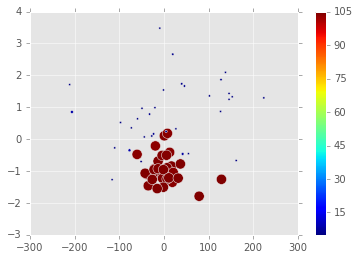

In [118]:
cm = plt.cm.get_cmap('RdYlBu')
g = plt.scatter(med_towns.a[1:], med_towns.b[1:], s=size, c=size,)# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
plt.colorbar(g)
plt.show()

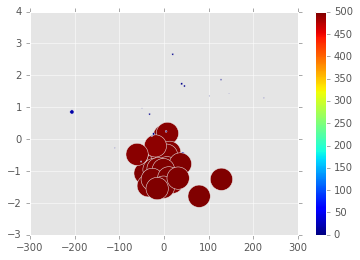

In [116]:
cm = plt.cm.get_cmap('RdYlBu')
g = plt.scatter(med_towns.a[1:], med_towns.b[1:], s=size, c=size,)# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
plt.colorbar(g)
plt.show()

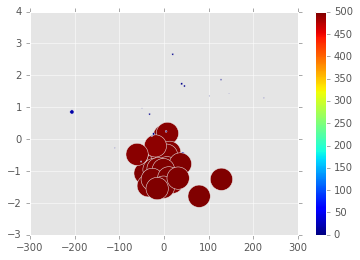

In [116]:
cm = plt.cm.get_cmap('RdYlBu')
g = plt.scatter(med_towns.a[1:], med_towns.b[1:], s=size, c=size,)# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
plt.colorbar(g)
plt.show()

In [81]:
num_large_towns = -1 + len(df['קובץ יישובים גדולים (10,000 +)'])
large_towns = df['קובץ יישובים גדולים (10,000 +)']
large_towns['Town_Name'] = large_towns['שם יישוב'].take([x for x in range(1,num_large_towns)])
large_towns['Immigration_pull'] = large_towns['מאזן הגירה פנימית2010 (מספר)'].take([x for x in range(1,num_large_towns)])
large_towns['Social_class'] = large_towns['מדד חברתי-כלכלי2008'].take([x for x in range(1,num_large_towns)])
large_towns['Arabic_population(%)'] = large_towns['אוכלוסייה ממוצעת של ערבים2010 (אחוז)'].take([x for x in range(1,num_large_towns)])
large_towns['Gini_coefficient'] = large_towns["מדד אי השוויון של שכירים(ג'יני), 2009"].fillna(value=1).take([x for x in range(1,num_large_towns)])
large_towns['Arabic_population(%)_categorical'] = pd.cut( np.asanyarray(large_towns['Arabic_population(%)']), 3, labels=["Non Arab","Mixed","Arab"])
large_towns['Arabic_population_plus'] = np.asanyarray([ x + 10 for x in large_towns['Arabic_population(%)']])
#ls = [ x + 10 for x in list(large_towns.c)]

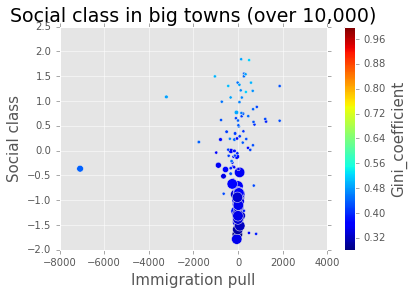

In [82]:
# labels = ['1% Arabic pop', '25% Arabic pop', '50% Arabic pop', '75% Arabic pop', '100% Arabic pop']
title = 'Social class in ' + 'big towns (over 10,000)'
xl = 'Immigration pull'
yl = 'Social class'
cl = 'Gini_coefficient'
cm = plt.cm.get_cmap('RdYlBu')
g = plt.scatter(large_towns.Immigration_pull, large_towns.Social_class,
                s=large_towns.Arabic_population_plus, c=large_towns.Gini_coefficient)# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
plt.colorbar(g).set_label(cl, size=15)
plt.title(title, size=19)
plt.xlabel(xl, size=15)
plt.ylabel(yl, size=15)
labels =  [large_towns['Town_Name'][i] for i in range(num_large_towns)]
g.figure.plugins = [plugins.PointLabelTooltip(g.figure, labels)]
plugins.connect(g.figure, plugins.MousePosition(fontsize=16))
plugins.connect(g.figure, plugins.PointLabelTooltip(g, labels))
# Links to scatter dot size legend: 
#    1) https://jonathanbright.org/2014/08/12/point-size-legends-in-matplotlib-and-basemap-plots/comment-page-1/

## Tooltip 4d function: 

In [85]:
sheet_bigTowns = 'קובץ יישובים גדולים (10,000 +)'
sheet_samllTowns = ' יישובים בינוניים (2,000-9,999)'
x = ('Immigration_pull', 'מאזן הגירה פנימית2010 (מספר)')
y = ('Social_class', 'מדד חברתי-כלכלי2008')
col = ('Gini_coefficient', "מדד אי השוויון של שכירים(ג'יני), 2009")
dot_size = ('Arabic_population(%)', 'אוכלוסייה ממוצעת של ערבים2010 (אחוז)')
samp = ('Town name', 'שם יישוב')
title = 'Social class in big towns (over 10,000)'


In [86]:
def tooltip_4d(data, sheet, x, y, col, size, samples): 
    num = -1 + len(data[sheet])
    print(num)
#     print(pd.DataFrame(data[sheet].iloc(75)))
    pframe = data[sheet]
    pframe[samples[0]] = pframe[samples[1]]#.take([x for x in range(1,num)])
    pframe[x[0]] = pframe[x[1]].take([x for x in range(1,num)])
    pframe[y[0]] = pframe[y[1]].take([x for x in range(1,num)])
    pframe[dot_size[0]] = pframe[dot_size[1]].take([x for x in range(1,num)])
    pframe[dot_size[0]] = np.asanyarray([ x + 10 for x in pframe[dot_size[0]]])
    pframe[col[0]] = pframe[col[1]].fillna(value=1).take([x for x in range(1,num)])

    title = 'Social class in ' + 'big towns (over 10,000)'
    xl = 'Immigration pull'
    yl = 'Social class'
    cl = 'Gini_coefficient'
    cm = plt.cm.get_cmap('RdYlBu')
    g = plt.scatter(pframe[x[0]], pframe[y[0]],
                s=pframe[dot_size[0]], c=pframe[col[0]])# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
    plt.colorbar(g).set_label(cl, size=15)
    plt.title(title, size=19)
    plt.xlabel(xl, size=15)
    plt.ylabel(yl, size=15)
    labels =  [pframe[samp[0]][i] for i in range(num)]
    g.figure.plugins = [plugins.PointLabelTooltip(g.figure, labels)]
    plugins.connect(g.figure, plugins.MousePosition(fontsize=16))
    plugins.connect(g.figure, plugins.PointLabelTooltip(g, labels))
    return 

119


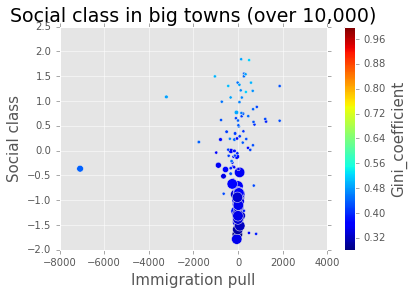

In [111]:
tooltip_4d(data=df, sheet=sheet_bigTowns, x=x, y=y, col=col, size=dot_size, samples=samp)

108


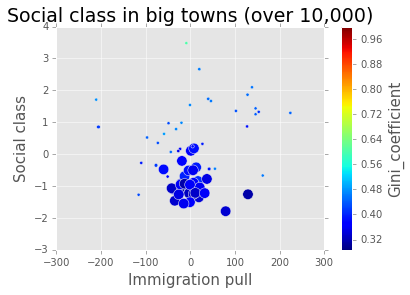

In [112]:
tooltip_4d(data=df, sheet=sheet_samllTowns, x=x, y=y, col=col, size=dot_size, samples=samp)

In [89]:

sheetb = 'קובץ יישובים גדולים (10,000 +)'
x = ('Immigration_pull', 'מאזן הגירה פנימית2010 (מספר)')
y = ('Social_class', 'מדד חברתי-כלכלי2008')
col = ('Gini_coefficient', "מדד אי השוויון של שכירים(ג'יני), 2009")
dot_size = ('Arabic_population(%)', 'אוכלוסייה ממוצעת של ערבים2010 (אחוז)')
samp = ('Town name', 'שם יישוב')
title = 'Social class in big towns (over 10,000)'


In [90]:
cm = plt.cm.get_cmap('RdYlBu')
g = plt.scatter(large_towns.a[1:], large_towns.b[1:], s=ls, c=color,)# c=['red']*(len(s1)-10)+['blue']*10)#list(med_towns.c[1:]))#, s=df.col3)
plt.colorbar(g)
#plt.show()
labels =  [large_towns['Town Name'][i] for i in range(num_large_towns)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]
plugins.connect(g.figure, plugins.MousePosition(fontsize=16))
plugins.connect(g.figure, plugins.PointLabelTooltip(g, labels))

mpld3.enable_notebook()

AttributeError: 'DataFrame' object has no attribute 'a'

In [ ]:
#for y in [x for x in df[' יישובים בינוניים (2,000-9,999)']]: 
 #   print(y)

In [ ]:
def numeric2categoric(percent): 
    if type(percent) != type(1):
        print(percent, type(percent))
        return [1, 2, 3, 4][int(percent*4)].astype('int')
        print(percent, type(percent))
        return percent
    else: 
        return percent

In [ ]:
num_large_towns = -1 + len(df['קובץ יישובים גדולים (10,000 +)'])
large_towns = df['קובץ יישובים גדולים (10,000 +)']
large_towns['Town Name'] = large_towns['שם יישוב'].take([x for x in range(1,num_large_towns)])
large_towns['Immigration - pull'] = large_towns['מאזן הגירה פנימית2010 (מספר)'].take([x for x in range(1,num_large_towns)])
large_towns['Social class'] = large_towns['מדד חברתי-כלכלי2008'].take([x for x in range(1,num_large_towns)])
large_towns['Arabic population(%)'] = large_towns['אוכלוסייה ממוצעת של ערבים2010 (אחוז)'].take([x for x in range(1,num_large_towns)])
large_towns['Gini coefficient'] = large_towns["מדד אי השוויון של שכירים(ג'יני), 2009"].fillna(value=1).take([x for x in range(1,num_large_towns)])
large_towns['Arabic population(%) categorical'] = pd.cut( np.asanyarray(large_towns['Arabic population(%)']), 3, labels=["Non Arab","Mixed","Arab"])
# ls = [ x + 10 for x in list(large_towns.c)]

In [ ]:
import seaborn as sns
#sns.set()

sns.pairplot(large_towns, hue='Arabic population(%) categorical')

In [ ]:
num_large_towns = -2 + len(df['קובץ יישובים גדולים (10,000 +)'])
large_towns = df['קובץ יישובים גדולים (10,000 +)']
nlarge_towns = pd.DataFrame()
nlarge_towns['Town Name'] = large_towns['שם יישוב'].take([x for x in range(1,num_large_towns)])
nlarge_towns['Immigration - pull'] = large_towns['מאזן הגירה פנימית2010 (מספר)'].take([x for x in range(1,num_large_towns)])
nlarge_towns['Social class'] = large_towns['מדד חברתי-כלכלי2008'].take([x for x in range(1,num_large_towns)])
nlarge_towns['Arabic population(%)'] = large_towns['אוכלוסייה ממוצעת של ערבים2010 (אחוז)'].take([x for x in range(1,num_large_towns)])
nlarge_towns['Gini coefficient'] = large_towns["מדד אי השוויון של שכירים(ג'יני), 2009"].fillna(value=1).take([x for x in range(1,num_large_towns)])
nlarge_towns['Arabic population(%) categorical'] = pd.cut( np.asanyarray(nlarge_towns['Arabic population(%)']), 3, labels=["Non Arab","Mixed","Arab"])
# ls = [ x + 10 for x in list(large_towns.c)]

In [ ]:
import seaborn as sns
#sns.set()

sns.pairplot(nlarge_towns, hue='Arabic population(%) categorical')

In [91]:
#import mpld3
#mpld3.enable_notebook()

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

#mpld3.enable_notebook()


KeyError: 'Immigration - pull'

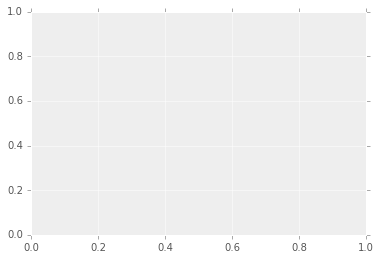

In [93]:

from mpld3 import plugins
import mpld3 

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(large_towns['Immigration - pull'],
                     large_towns['Social class'],
                     c=np.asanyarray([x*10 for x in large_towns['Gini coefficient']]),
                     s = np.asarray([x + 10 for x in large_towns['Arabic population(%)'].fillna(value=1)]),
                     alpha=1,
                     cmap=plt.cm.RdYlBu_r)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

#labels = ['point {0}'.format(i + 1) for i in range(N)]
labels =  [large_towns['Town Name'][i] for i in range(num_large_towns)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]
plugins.connect(fig, plugins.MousePosition(fontsize=16))
plugins.connect(fig, plugins.PointLabelTooltip(scatter, labels))

mpld3.enable_notebook()

#mpld3.display()


In [94]:
pd.read_html('CITY_cordiantes.xml', flavor=lxml)

NameError: name 'lxml' is not defined

In [95]:
import ipywidgets

In [96]:
ipywidgets.Checkbox

ipywidgets.widgets.widget_bool.Checkbox

In [97]:
def matrix_plot(frame, ticket, p1, p2, p3, p4, p5, col): 
    num_samples = -1 + len(df[ticket])
    df_tiket = frame[ticket]
    df_tiket[p1] = df_tiket[p1].take([x for x in range(1,num_samples)])
    df_tiket[p2] = df_tiket[p2].take([x for x in range(1,num_samples)])
    df_tiket[p3] = df_tiket[p3].take([x for x in range(1,num_samples)])
    df_tiket[p4] = df_tiket[p4].take([x for x in range(1,num_samples)])
    df_tiket[p5] = df_tiket[p5].fillna(value=1).take([x for x in range(1,num_samples)])
    df_tiket[col] = pd.cut( np.asanyarray(df_tiket[col]), 3, labels=["Non Arab","Mixed","Arab"])
    sns.pairplot(df_diket, hue=col)
    # ls = [ x + 10 for x in list(large_towns.c)]
    

In [98]:
def matrix_plot(frame, ticket, features): 
    num_samples = -1 + len(df[ticket])
    df_tiket = frame[ticket]
    df_tiket[features[0]] = df_tiket[features[0]].take([x for x in range(1,num_samples)])
    df_tiket[features[1]] = df_tiket[features[1]].take([x for x in range(1,num_samples)])
    df_tiket[features[2]] = df_tiket[features[2]].take([x for x in range(1,num_samples)])
    df_tiket[features[3]] = df_tiket[features[3]].take([x for x in range(1,num_samples)])
    df_tiket[features[4]] = df_tiket[features[4]].fillna(value=1).take([x for x in range(1,num_samples)])
    df_tiket[features[5]] = pd.cut( np.asanyarray(df_tiket[col]), 3, labels=["third1","third2","third3"])
    sns.pairplot(df_diket, hue=df_tiket[features[5]])
    # ls = [ x + 10 for x in list(large_towns.c)]
    
def matrix_plot1(frame, ticket, features): 
    df_ticket = frame[ticket]
    num_samples = -1 + len(df_ticket)
    for f in features: 
        df_ticket[f] = df_ticket[f].take([x for x in range(1,num_samples)])
#     df_tiket[features[4]] = df_tiket[features[4]].fillna(value=1).take([x for x in range(1,num_samples)])
#     df_tiket[features[5]] = pd.cut( np.asanyarray(df_tiket[col]), 3, labels=["third1","third2","third3"])
    print('num_samples: ', num_samples)
    return df_ticket
    #sns.pairplot(df_ticket,)# hue=df_tiket[features[5]])
    # ls = [ x + 10 for x in list(large_towns.c)]
    

In [99]:
matrix_plot(frame=df, ticket='')

TypeError: matrix_plot() missing 1 required positional argument: 'features'

In [100]:
def inter_matrix_plot(**params):
    return sorted([p for p in params if params[p]==True])



In [101]:
matrix_plot1(frame=df, ticket='קובץ יישובים גדולים (10,000 +)', features = ['מאזן הגירה פנימית2010 (מספר)', 'מדד חברתי-כלכלי2008' ])

num_samples:  119


,סמל יישוב,שם יישוב,שם מחוז,שם נפה,אשכול חברתי-כלכלי2008,מדד חברתי-כלכלי2008,מדד פריפריאליות2004,אוכלוסייה ממוצעת2010 (אלפים),אוכלוסייה ממוצעת של יהודים ואחרים2010 (אחוז),אוכלוסייה ממוצעת של יהודים2010 (אחוז),...,"מעשנים כיום בגיל50-74, 2009 (אחוז),נקבה","מעשנים כיום בגיל50-74, 2009 (אחוז),שני המינים",Town_Name,Immigration_pull,Social_class,Arabic_population(%),Gini_coefficient,Arabic_population(%)_categorical,Arabic_population_plus,Town name
0,yshuv,shemyshuv,shem_mahoz,shem_nafa,eshkol08,NaN,per04,uc2010,Jewso10,Jews10,...,smoking_fem,smoking_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shemyshuv
1,31,אופקים,דרום,באר שבע,3,-0.761509,2,24.1,99.3,92.6,...,NaN,NaN,אופקים,-197,-0.761509,10.7,0.3651,Non Arab,10.7,אופקים
2,70,אשדוד,דרום,אשקלון,5,-0.103801,4,208.5,99.9,91.1,...,..,(15.4),אשדוד,-425,-0.103801,10.1,0.4164,Non Arab,10.1,אשדוד
3,154,תל מונד,מרכז,השרון,9,1.84168,4,10.4,100,99,...,NaN,NaN,תל מונד,137,1.84168,10.0,0.4866,Non Arab,10.0,תל מונד
4,166,גן יבנה,מרכז,רחובות,6,0.525675,3,18.9,99.7,97.2,...,NaN,NaN,גן יבנה,732,0.525675,10.3,0.4029,Non Arab,10.3,גן יבנה
5,168,כפר יונה,מרכז,השרון,7,0.88123,4,18.2,100,98,...,NaN,NaN,כפר יונה,835,0.88123,10.0,0.4201,Non Arab,10.0,כפר יונה
6,182,אבן יהודה,מרכז,השרון,8,1.37048,4,10.8,99.9,98.6,...,NaN,NaN,אבן יהודה,576,1.37048,10.1,0.4977,Non Arab,10.1,אבן יהודה
7,195,קדימה-צורן,מרכז,השרון,7,0.977179,4,16.9,100,98.1,...,NaN,NaN,קדימה-צורן,60,0.977179,10.0,0.4611,Non Arab,10.0,קדימה-צורן
8,229,גני תקווה,מרכז,פתח תקווה,8,1.21427,5,13.1,99.9,98.9,...,NaN,NaN,גני תקווה,116,1.21427,10.1,0.471,Non Arab,10.1,גני תקווה
9,240,יקנעם עילית,צפון,יזרעאל,6,0.65194,3,19.3,100,92.8,...,NaN,NaN,יקנעם עילית,-99,0.65194,10.0,0.4179,Non Arab,10.0,יקנעם עילית


In [102]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget, Checkbox

StaticInteract(matrix_plot,
               s
               features = Checkbox([f for f in ])
               amplitude=RangeWidget(0.1, 1.0, 0.1),
               color=RadioWidget(['blue', 'green', 'red']))

SyntaxError: invalid syntax (<ipython-input-102-86e3804499b4>, line 5)

In [103]:
def cb(a, b,): 
    if a and b: 
        return [(a, 'a'), (b, 'b')]
    if a: 
        return [(a, 'a')]
    if b: return [(b, 'b')]
    
def cb1(**params): 
    return sorted([p for p in params if params[p]==True])

In [104]:

from ipywidgets import *

In [105]:
cbd = {'a':Checkbox(), 'b':Checkbox(), 'c':Checkbox(), 'd':Checkbox(), 'e':Checkbox(),'f':Checkbox(),'g':Checkbox(),}

/home/noamk/anaconda3/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:209: DeprecationWarning: Layout._comm_changed is deprecated: use @observe and @unobserve instead.
  def _comm_changed(self, name, new):
/home/noamk/anaconda3/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:209: DeprecationWarning: Checkbox._comm_changed is deprecated: use @observe and @unobserve instead.
  def _comm_changed(self, name, new):
/home/noamk/anaconda3/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:209: DeprecationWarning: Layout._comm_changed is deprecated: use @observe and @unobserve instead.
  def _comm_changed(self, name, new):
/home/noamk/anaconda3/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:209: DeprecationWarning: Checkbox._comm_changed is deprecated: use @observe and @unobserve instead.
  def _comm_changed(self, name, new):
/home/noamk/anaconda3/lib/python3.5/site-packages/ipywidgets/widgets/widget.py:209: DeprecationWarning: Layout._comm_changed is deprecat

In [106]:
cbd

{'a': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41e02dd8>,
 'b': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41e63a20>,
 'c': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41e68d30>,
 'd': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41e687f0>,
 'e': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe49f4a8d0>,
 'f': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41f613c8>,
 'g': <ipywidgets.widgets.widget_bool.Checkbox at 0x7efe41f615c0>}

In [107]:
interact(cb, **cbd)

<function __main__.cb>

In [108]:
interact(cb, a=Checkbox(), b=Checkbox())

<function __main__.cb>

In [109]:
interact(cb1, **cbd)

[]

<function __main__.cb1>

Pivoting and stacking: 
from: http://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [24]:
import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df = unpivot(tm.makeTimeDataFrame())


In [25]:
df

,date,variable,value
0,2000-01-03,A,0.426727
1,2000-01-04,A,-0.039925
2,2000-01-05,A,-1.646980
3,2000-01-03,B,0.007505
4,2000-01-04,B,-0.243751
5,2000-01-05,B,0.470830
6,2000-01-03,C,0.695926
7,2000-01-04,C,0.990725
8,2000-01-05,C,-1.251981
9,2000-01-03,D,0.979932


In [26]:
df.pivot(index='date', columns='variable', values='value')

variable,A,B,C,D
date,,,,
2000-01-03,0.426727,0.007505,0.695926,0.979932
2000-01-04,-0.039925,-0.243751,0.990725,0.556760
2000-01-05,-1.646980,0.470830,-1.251981,0.217737


In [28]:
df['value2'] = df['value'] * 2
df

,date,variable,value,value2
0,2000-01-03,A,0.426727,0.853455
1,2000-01-04,A,-0.039925,-0.079850
2,2000-01-05,A,-1.646980,-3.293961
3,2000-01-03,B,0.007505,0.015009
4,2000-01-04,B,-0.243751,-0.487502
5,2000-01-05,B,0.470830,0.941660
6,2000-01-03,C,0.695926,1.391852
7,2000-01-04,C,0.990725,1.981451
8,2000-01-05,C,-1.251981,-2.503962
9,2000-01-03,D,0.979932,1.959864


In [29]:
pivoted = df.pivot('date', 'variable')


In [30]:
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  0.426727  0.007505  0.695926  0.979932  0.853455  0.015009   
2000-01-04 -0.039925 -0.243751  0.990725  0.556760 -0.079850 -0.487502   
2000-01-05 -1.646980  0.470830 -1.251981  0.217737 -3.293961  0.941660   

                                
variable           C         D  
date                            
2000-01-03  1.391852  1.959864  
2000-01-04  1.981451  1.113520  
2000-01-05 -2.503962  0.435474

<a id='Appendix'></a>

## Appendix

[back to top](#top)

references: 
- Great tutorials: 
    - PCA: For a thourogh explanation of PCA and complete code examples: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- Visualizations: 
    - Great visusualizations on pandas table (Pie, Scatter matrix, Radviz_spring_tension):
    http://pandas.pydata.org/pandas-docs/stable/visualization.html
    - Seaborn on pandas: (Clustermap) http://chrisalbon.com/python/pandas_with_seaborn.html
    - Boke map visualizations: http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/gallery/texas.ipynb
    - Data visualiztion with pandas: http://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
- towns in Israel: http://www.cbs.gov.il/ishuvim/ishuvim_main.htm
- Resources: 
    - PCA explanation and visualizatioin: http://setosa.io/ev/principal-component-analysis/

[back to top](#top)

<h2> תרומת העבודה  </h2>

<div style="direction:rtl"> <br>
ניתן לחלק את תרומת העבודה למספר תחומים באופן הבא.
</div>
<div style="direction:rtl"> <br>
עיבוד מקדים: עותק של המידע המעובד זמין בקישור הבא: TODO
הקוד לניקוי והכנת המידע המתאים לכל טבלה כמו המידע הנתון זמין (והיה זמין מרגע שהיה מוכן) בקישור כאן TODO
</div>

<div style="direction:rtl"> <br>
ניתוח גורמים מרכזיים: 
ניתן למצוא את הגורמים הראשיים בקובץ זה. בנוסף ניתן לראות את הסיכום הידני שבוצע לכל וקטור לכדי צמצום של מספר מילות מפתח. 
TODO - LINK TO WORDS
https://docs.google.com/spreadsheets/d/1rbw5W6k_CM_ijZtvfI5DtApWfwExfOZskm616Uk6JZo/edit?usp=sharing
גם במקרה זה זמין הקוד בקישור הזה. TODO_ADD LINK
</div>
<div style="direction:rtl"> <br>
אספקט נוסף בתרומת העבודה הוא הויזואליזציות. כמו כל שאר הקוד בעיבוד זה, הויזואליזציות נכתבו כפונקציות גנריות המקבלות מקורות מידע ועמודות רצויות ומציגות את המידע המבוקש. מעבר לגרפים האינטרקטיביים שהצגנו בעבודה זו, יצרנו כלים ידידותיים לשימוש עתידי פשוט בלי צורך להבין את הקוד. </div>

<div style="direction:rtl"> <br>
 TODO התייחסות להמלצות
</div>

In [2]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.5em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
text-align:right;
}
</style>
""")